In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
import requests
from urllib.parse import urlparse
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc

In [41]:
basedir = './Training/Training_20210123_1110/'

In [16]:
%%time
# Read Data

training_data_df = pd.read_csv('./Training/Training_20210123_1110/training_data_20210123_1208.csv')
print(training_data_df.shape)
training_data_df.head()

(1686125, 279)
Wall time: 12.3 s


,전월세매매구분,전용면적,금액(만원),층,가격면적,년,target_log_transformed,targetarea_log_transformed,건물종류,전용면적_mean,전용면적_min,전용면적_max,건물나이2,year_linear,month_sin,month_cos,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,공시지가,(한강)폐기물매립시설 설치제한지역,가로구역별 최고높이 제한지역,가축사육제한구역,개발제한구역,개발행위허가제한지역,건축선,건축용도지역기타,건축허가·착공제한지역,경관녹지,경관지구,고도지구,고속철도,공공공지,공공도서관,공공주택지구,공공청사,공원,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,과밀억제권역,광로1류(폭 70M 이상),광로2류(폭 50M~70M),광로3류(폭 40M~50M),광역계획구역,광장,교육환경보호구역,국가산업단지,국민임대주택단지예정지구,국토이용용도지구기타,근린공원,근린상업지역,기타공원시설,기타녹지시설,기타도로시설,녹지,대공방어협조구역,대공방어협조구역(위탁고도54-236m),대공방어협조구역(위탁고도77-257m),대로1류(폭 35M~40M),대로2류(폭 30M~35M),대로3류(폭 25M~30M),도로,도로구역,도서관,도시개발구역,도시관리계획 입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시자연공원구역,도시지역,도시지역기타,도시철도,문화시설,문화재보존영향 검토대상구역,문화재보호구역,문화재보호구역기타,방수설비,방화지구,보전산지,보전임지,보행자전용도로,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사방지,사업지역기타,사회복지시설,산업시설구역,상대보호구역,소공원,소로1류(폭 10M~12M),소로2류(폭 8M~10M),소로3류(폭 8M 미만),수도공급시설,수평표면구역,시장,아파트지구,야생생물보호구역,어린이공원,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,완충녹지,용도구역기타,용도구역미분류,원추표면구역,유수지,유통상업지역,유통업무설비,일단의주택단지조성사업지역,일반도로,일반상업지역,일반주거지역,일반철도,임업용산지,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재정비촉진지구,재정비촉진지구기타,전기공급설비,전통사찰보존구역,절대보호구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제3종 구역,제3종일반주거지역,제한보호구역,제한보호구역(전술항공5km),제한보호구역(후방지역500m),조례로정한지역,조망가로특화경관지구,종합의료시설,주차장,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭 20M~25M),중로2류(폭 15M~20M),중로3류(폭 12M~15M),중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,진입표면구역,철도,청소년수련시설,체육시설,침수위험지구,택지개발예정지구,토지거래계약에관한허가구역,특정개발진흥지구,특화경관지구,하수도,하수종말처리시설,하천,하천구역,학교,현상변경허가 대상구역,지붕_(철근)콘크리트_있음,지붕_기타지붕_있음,지붕_기와_있음,지붕_슬레이트_있음,최빈지붕,주_용도_부대시설_있음,주_용도_주차장_있음,주_용도_복리시설_있음,주_용도_사무소_있음,주_용도_소매점_있음,주_용도_일반음식점_있음,주_용도_기타제1종근생활시설_있음,주_용도_기타제2종근생활시설_있음,주_용도_기타근린생활시설_있음,주_용도_기타창고시설_있음,주_용도_기타판매시설_있음,주_용도_기타일반업무시설_있음,주_용도_기타사무소_있음,주_용도_유치원_있음,주_용도_노인복지시설_있음,주_용도_치과의원_있음,주_용도_의원_있음,주_용도_제조업소_있음,주_용도_대피소_있음,주_용도_휴게음식점_있음,주_용도_학원_있음,주_용도_생활편익시설_있음,주_용도_세탁소_있음,주_용도_창고_있음,주_용도_독서실_있음,주_용도_기타노유자시설_있음,주_용도_부동산중개업소_있음,주_용도_기타교육연구시설_있음,주_용도_이(미)용원_있음,주_용도_기타자동차관련시설_있음,주_용도_어린이집_있음,주_용도_한의원_있음,주_용도_금융업소_있음,주_용도_파출소_있음,주_용도_상점_있음,주_용도_게임제공업소_있음,주_용도_일반목욕장_있음,주_용도_공중화장실_있음,주_용도_부동산중개사무소_있음,주_용도_미용원_있음,주_용도_기타아동관련시설_있음,주_용도_영유아보육시설_있음,주_용도_체육도장_있음,주_용도_기타종교집회장_있음,주_용도_기타 운동시설_있음,주_용도_노래연습장_있음,주_용도_당구장_있음,주_용도_기타의료시설_있음,주_용도_교회_있음,주_용도_목욕장_있음,주_용도_기타운동시설_있음,주_용도_기타문화및집회시설_있음,주_용도_기타전시장_있음,주_용도_사진관_있음,주_용도_체력단련장_있음,주_용도_시장_있음,주_용도_골프연습장_있음,주_용도_기타종교시설_있음,주_용도_사회복지시설_있음,주_용도_기타공공시설_있음,주_용도_기타판매및영업시설_있음,주_용도_의료기기판매소_있음,주_용도_서점(1종근.생미해당)_있음,주_용도_변전소_있음,주_용도_병원_있음,주_용도_예식장_있음,주_용도_공공도서관_있음,주_용도_극장_있음,주_용도_기타공공업무시설_있음,주_용도_운동장시설_있음,주_용도_마을공동작업소_있음,주_용도_동사무소_있음,주_용도_기타제2종근린생활시설_있음,주_용도_기타제1종근린생활시설_있음,주_용도_보건소_있음,최빈용도,구조_철근콘크리트구조_있음,구조_벽돌구조_있음,구조_철골콘크리트구조_있음,구조_기타조적구조_있음,구조_경량철골구조_있음,구조_철골철근콘크리트구조_있음,구조_일반철골구조_있음,구조_기타강구조_있음,구조_프리케스트콘크리트구조_있음,구조_블록구조_있음,구조_기타콘크리트구조_있음,구조_일반목구조_있음,최빈구조,구,동
0,0,77.75,55000,7,707.395498,2014,10.915088,6.561590,0,77.75,77.75,77.75,676,8.000000,0.000000,1.0,0,1168.3,0,0,0,0,0,0,9393000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,77.75,59500,4,765.273312,2014,10.993732,6.640233,0,77.75,77.75,77.75,676,8.833333,-0.866025,0.5,0,1168.3,0,0,0,0,0,0,9393000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [23]:
from sklearn.preprocessing import QuantileTransformer
import joblib

In [18]:
transformer = QuantileTransformer(output_distribution='normal')

In [19]:
training_data_df['건물나이2'] = transformer.fit_transform(training_data_df[['건물나이2']])

<AxesSubplot:>

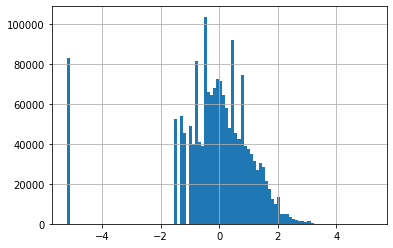

In [20]:
training_data_df['건물나이2'].hist(bins=100)

In [24]:
joblib.dump(transformer, './Training/Training_20210123_1110/quantiletransformer')

['./Training/Training_20210123_1110/quantiletransformer']

In [21]:
transformer.get_params()

{'copy': True,
 'ignore_implicit_zeros': False,
 'n_quantiles': 1000,
 'output_distribution': 'normal',
 'random_state': None,
 'subsample': 100000}

In [28]:
training_data_df['토지면적'].describe()

count    1.686125e+06
mean     2.280326e+04
std      3.787028e+04
min      1.000000e+00
25%      3.101000e+02
50%      5.369700e+03
75%      3.054500e+04
max      2.968461e+05
Name: 토지면적, dtype: float64

In [31]:
training_data_df.drop(columns=['토지면적'], inplace=True)

In [32]:
test_data = training_data_df.sample(frac=0.2)
train_data = training_data_df.drop(test_data.index)
valid_data = train_data.sample(frac=0.2)
train_data = train_data.drop(valid_data.index)
print(test_data.shape)
print(valid_data.shape)
print(train_data.shape)

(337225, 278)
(269780, 278)
(1079120, 278)


In [33]:
target_cols = ['금액(만원)', '가격면적', 'target_log_transformed', 'targetarea_log_transformed']#, 'land_area_log']

In [34]:
x_test = test_data.drop(columns=target_cols)
y_test = test_data['가격면적']
print(x_test.shape)
print(y_test.shape)

(337225, 274)
(337225,)


In [35]:
x_valid = valid_data.drop(columns=target_cols)
y_valid = valid_data['가격면적']
print(x_valid.shape)
print(y_valid.shape)

(269780, 274)
(269780,)


In [36]:
x_train = train_data.drop(columns=target_cols)
y_train = train_data['가격면적']
print(x_train.shape)
print(y_train.shape)

(1079120, 274)
(1079120,)


<AxesSubplot:>

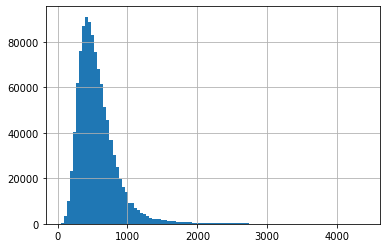

In [37]:
y_train.hist(bins=100)

# Training

In [38]:
from sklearn.metrics import r2_score

# ML Models

# Light GBM

In [39]:
import lightgbm as lgb

In [40]:
params = {
    'objective':'regression',
    'learning_rate': 0.03,
    'num_leaves': 31,
    'seed': 42,
    'max_depth': -1,
    'lambda_l2':0,
    'metric':'rmse'
}

In [42]:
cat_cols_df = pd.read_csv(basedir + 'cat_cols.csv')
cat_cols_df.head()

,colname
0,전월세매매구분
1,건물종류
2,구
3,동
4,지목명


In [44]:
cat_cols = [col for col in training_data_df.columns if col in cat_cols_df['colname'].tolist()]
len(cat_cols)

172

In [45]:
train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
valid_dataset = lgb.Dataset(x_valid, label=y_valid, categorical_feature=cat_cols)

In [46]:
# without 토지면적 log
num_rounds = 500000

bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[valid_dataset], early_stopping_rounds=100, verbose_eval=50)

c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.252587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2667
[LightGBM] [Info] Number of data points in the train set: 1079120, number of used features: 274


c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 570.275546
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 154.18
[100]	valid_0's rmse: 121.846
[150]	valid_0's rmse: 107.847
[200]	valid_0's rmse: 100.634
[250]	valid_0's rmse: 96.2127
[300]	valid_0's rmse: 93.2748
[350]	valid_0's rmse: 91.0589
[400]	valid_0's rmse: 89.3048
[450]	valid_0's rmse: 87.8304
[500]	valid_0's rmse: 86.5606
[550]	valid_0's rmse: 85.5068
[600]	valid_0's rmse: 84.5736
[650]	valid_0's rmse: 83.7229
[700]	valid_0's rmse: 82.9433
[750]	valid_0's rmse: 82.2286
[800]	valid_0's rmse: 81.5872
[850]	valid_0's rmse: 80.993
[900]	valid_0's rmse: 80.475
[950]	valid_0's rmse: 80.0011
[1000]	valid_0's rmse: 79.5313
[1050]	valid_0's rmse: 79.1123
[1100]	valid_0's rmse: 78.6561
[1150]	valid_0's rmse: 78.2501
[1200]	valid_0's rmse: 77.9421
[1250]	valid_0's rmse: 77.5559
[1300]	valid_0's rmse: 77.2211
[1350]	valid_0's rms

KeyboardInterrupt: 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50725 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s

c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50725 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\max6296\ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0, flags

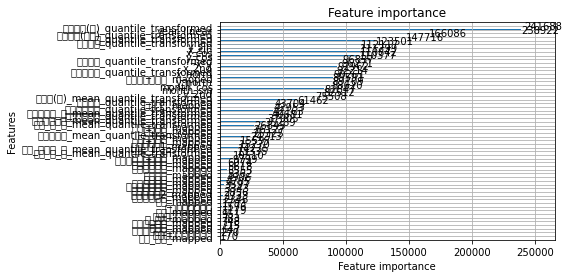

In [40]:
lgb.plot_importance(bst)

In [41]:
preds = bst.predict(x_test, num_iteration=bst.best_iteration)

In [44]:
bst.save_model('lgb_model_for_training_data_ver_8.txt')

In [42]:
pd.DataFrame(y_test).to_csv('y_test_training_data_ver_8.csv', index=False)

In [43]:
pd.DataFrame({'preds':preds}).to_csv('lgb_preds_training_data_ver_8.csv', index=False)

In [45]:
y_test_pricearea = test_data['가격/면적']

In [46]:
r2_score(y_test, preds)

0.9417930919921742

In [47]:
r2_score(y_test_pricearea, np.e**preds)

0.9634302783232506

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_test, preds)

0.013384905019118617

In [51]:
mean_squared_error(y_test_pricearea, np.e**preds)

3266.915668386197

In [ ]:
compare_df = pd.DataFrame({'y_test':y_test, 'preds':preds})
print(compare_df.shape)
compare_df.head(50)

In [ ]:
compare_df.tail()

In [ ]:
mean_squared_error(y_test, pred)

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
mean_squared_log_error(y_test, pred)

In [ ]:
pred_df = pd.DataFrame({'pred':pred})
print(pred_df.shape)
pred_df.head()

In [ ]:
negative_df = pred_df[pred_df['pred'] < 0]
print(negative_df.shape)

In [ ]:
negative_df

In [ ]:
y_test_df = pd.DataFrame({'y_test':y_test}).reset_index(drop=True)
print(y_test_df.shape)
y_test_df.head()

In [ ]:
y_test_df.loc[negative_df.index,:]

In [ ]:
col_map

In [ ]:
x_test.loc[y_test.iloc[negative_df.index].index,:]

# CatBoost

In [ ]:
from catboost import Pool, CatBoostRegressor

In [ ]:
train_pool = Pool(x_train, y_train, cat_features=cat_cols_mapped)
val_pool = Pool(x_valid, y_valid, cat_features=cat_cols_mapped)
test_pool = Pool(x_test, y_test, cat_features=cat_cols_mapped)

In [ ]:
model = CatBoostRegressor(task_type='GPU', iterations=100000, learning_rate=0.1)

In [ ]:
model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=100)